In [7]:
%reload_ext autoreload
%autoreload 2

import torch
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from torch import nn


# from qclassifier import models, visualization, noise
from qclassifier.models import ClassifierOriginal, ClassifierImproved, ClassifierMultiQubit
from qclassifier.noise import DepolarizingChannel, ThermalRelaxationChannel
from qclassifier.datasets import get_sample_data
from qclassifier.visualization import plot_prediction
from qclassifier.training_tools import best_initial_conditions, train, test

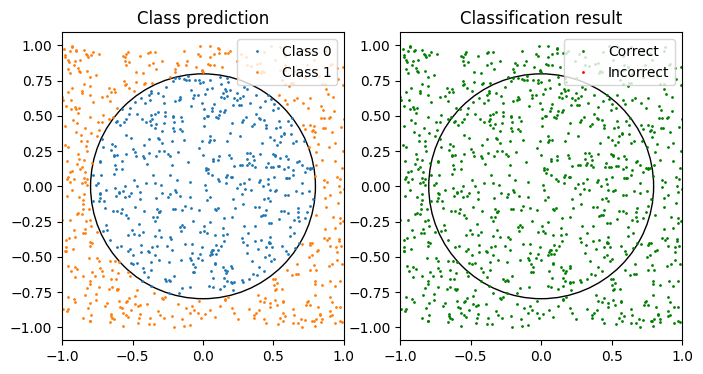

100%|██████████| 20/20 [00:08<00:00,  2.42it/s, Lowest loss=0.425]


TypeError: cannot unpack non-iterable ClassifierOriginal object

In [10]:
# Carico ogni dataset, creo ogni tipo di modello e uso tutte le funzioni
datasets = ['1 circle','3 circles','one piece','mnist']

for dataset in datasets:

    # Carico il dataset
    data_train, data_test = get_sample_data(dataset, N_train = 1000, N_test = 2000)
    D = data_train[0].shape[1]
    C = len(torch.unique(data_train[1]))

    plot_prediction(data_train, data_train[1], dataset)
    plt.show()

    # Train modello original
    L = 1
    depolarizing_channel = DepolarizingChannel()
    thermal_channel = ThermalRelaxationChannel()

    model = ClassifierOriginal(D = D, L = L, C = C, noise_channels = [depolarizing_channel, thermal_channel])        
    model = best_initial_conditions(model, data_train, batch_size = 100, epochs = 5)
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)
    stats = train(model, optimizer, data_train, data_test, epochs = 500, batch_size = 100, patience = 25)
    accuracy = test(model, data_test, batch_size = 100)

    plt.figure(figsize = (8,4))
    plt.subplot(1,2,1)
    plt.plot(stats['Train loss'])
    plt.plot(stats['Test loss'])
    plt.subplot(1,2,2)
    plt.plot(stats['Train accuracy'])
    plt.plot(stats['Test accuracy'])
    plt.show()

